In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
df=pd.read_excel('/content/drive/MyDrive/LIDCI/5/PROCESAMIENTO DE LENGUAJE NATURAL/canciones_eng_fin (1).xlsx')
df.head()

,artist,song,lyrics
0,Foo Fighters,"""Everlong""","Hello, I've waited here for you\nEverlong\nTon..."
1,Foo Fighters,"""My Hero""",Too alarmin' now to talk about\nTake your pict...
2,Foo Fighters,"""The Pretender""","Keep you in the dark, you know they all preten..."
3,Foo Fighters,"""All My Life""","All my life, I've been searchin' for somethin'..."
4,Foo Fighters,"""Best of You""",I've got another confession to make\nI'm your ...


In [ ]:
len(df)

1824

<Axes: xlabel='artist'>

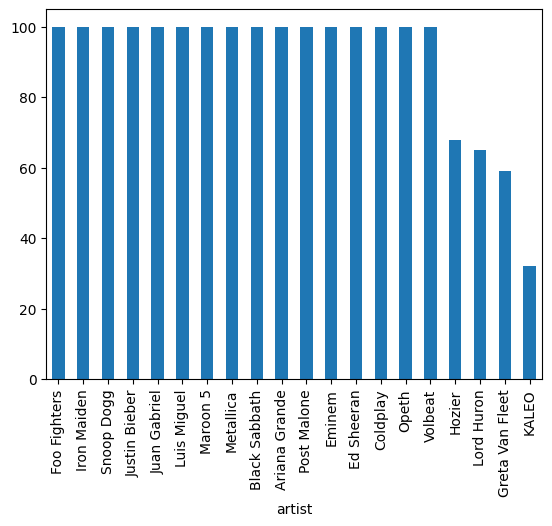

In [ ]:
df['artist'].value_counts().plot(kind='bar')

In [ ]:
artistas = ['Ariana Grande', 'Iron Maiden', 'Ed Sheeran']
df = df[df['artist'].isin(artistas)]
df.head()

,artist,song,lyrics
100,Iron Maiden,"""The Number of the Beast""","Woe to you, o'er Earth and Sea\nFor the Devil ..."
101,Iron Maiden,"""The Trooper""","You'll take my life, but I'll take yours too\n..."
102,Iron Maiden,"""Fear of the Dark""",I am a man who walks alone\nAnd when I'm walki...
103,Iron Maiden,"""Hallowed Be Thy Name""",I'm waiting in my cold cell when the bell begi...
104,Iron Maiden,"""Run to the Hills""",White man came across the sea\nHe brought us p...


In [ ]:
df['lyrics'].iloc[0].splitlines(keepends=True)

["Woe to you, o'er Earth and Sea\n",
 'For the Devil sends the beast with wrath\n',
 'Because he knows the time is short\n',
 'Let him who hath understanding reckon the number of the beast\n',
 'For it is a human number\n',
 'Its number is six hundred and sixty-six\n',
 '\n',
 'I left alone, my mind was blank\n',
 'I needed time to think, to get the memories from my mind\n',
 'What did I see? Can I believe\n',
 'That what I saw that night was real and not just fantasy?\n',
 'Just what I saw, in my old dreams\n',
 'Were they reflections of my warped mind staring back at me?\n',
 "Cos in my dreams, it's always there\n",
 'The evil face that twists my mind and brings me to despair\n',
 'Yeah\n',
 '\n',
 'Night was black, was no use holding back\n',
 'Cos I just had to see, was someone watching me?\n',
 'In the mist, dark figures move and twist\n',
 'Was all this for real, or just some kind of hell?\n',
 '\n',
 'Six-six-six, the number of the beast\n',
 'Hell and fire was spawned to be rel

In [ ]:
data = ' '.join(df['lyrics']).splitlines(keepends=True)
data

["Woe to you, o'er Earth and Sea\n",
 'For the Devil sends the beast with wrath\n',
 'Because he knows the time is short\n',
 'Let him who hath understanding reckon the number of the beast\n',
 'For it is a human number\n',
 'Its number is six hundred and sixty-six\n',
 '\n',
 'I left alone, my mind was blank\n',
 'I needed time to think, to get the memories from my mind\n',
 'What did I see? Can I believe\n',
 'That what I saw that night was real and not just fantasy?\n',
 'Just what I saw, in my old dreams\n',
 'Were they reflections of my warped mind staring back at me?\n',
 "Cos in my dreams, it's always there\n",
 'The evil face that twists my mind and brings me to despair\n',
 'Yeah\n',
 '\n',
 'Night was black, was no use holding back\n',
 'Cos I just had to see, was someone watching me?\n',
 'In the mist, dark figures move and twist\n',
 'Was all this for real, or just some kind of hell?\n',
 '\n',
 'Six-six-six, the number of the beast\n',
 'Hell and fire was spawned to be rel

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.optimizers import Adam

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(data)

In [ ]:
tokenizer.word_index

{'the': 1,
 'you': 2,
 'i': 3,
 'and': 4,
 'to': 5,
 'me': 6,
 'my': 7,
 'a': 8,
 'it': 9,
 'in': 10,
 'oh': 11,
 'of': 12,
 'on': 13,
 "i'm": 14,
 'your': 15,
 'that': 16,
 'love': 17,
 'know': 18,
 'yeah': 19,
 'be': 20,
 'all': 21,
 'for': 22,
 'we': 23,
 'but': 24,
 'is': 25,
 "don't": 26,
 'with': 27,
 'like': 28,
 'so': 29,
 'just': 30,
 'no': 31,
 'up': 32,
 'if': 33,
 'baby': 34,
 'this': 35,
 'when': 36,
 'now': 37,
 'got': 38,
 "it's": 39,
 'can': 40,
 'what': 41,
 "you're": 42,
 'are': 43,
 'time': 44,
 'one': 45,
 'never': 46,
 'ooh': 47,
 'go': 48,
 "i'll": 49,
 'do': 50,
 'way': 51,
 "'cause": 52,
 'out': 53,
 'see': 54,
 'make': 55,
 'they': 56,
 'let': 57,
 'down': 58,
 'not': 59,
 'wanna': 60,
 'want': 61,
 'back': 62,
 'from': 63,
 'get': 64,
 'say': 65,
 'need': 66,
 'will': 67,
 'how': 68,
 "ain't": 69,
 'come': 70,
 'he': 71,
 'at': 72,
 'feel': 73,
 'tell': 74,
 'been': 75,
 'boy': 76,
 'have': 77,
 "can't": 78,
 'day': 79,
 'take': 80,
 'life': 81,
 'here': 82,
 

In [ ]:
encoded_text = tokenizer.texts_to_sequences(data)
encoded_text

[[2494, 5, 2, 2495, 456, 4, 581],
 [22, 1, 787, 3312, 1, 928, 27, 2496],
 [582, 71, 347, 1, 44, 25, 1488],
 [57, 202, 170, 3313, 2016, 1701, 1, 528, 12, 1, 928],
 [22, 9, 25, 8, 788, 528],
 [874, 528, 25, 348, 1327, 4, 2497, 348],
 [],
 [3, 217, 232, 7, 117, 83, 2498],
 [3, 672, 44, 5, 124, 5, 64, 1, 711, 63, 7, 117],
 [41, 293, 3, 54, 40, 3, 197],
 [16, 41, 3, 418, 16, 95, 83, 220, 4, 59, 30, 2499],
 [30, 41, 3, 418, 10, 7, 315, 339],
 [131, 56, 2500, 12, 7, 3314, 117, 2017, 62, 72, 6],
 [1702, 10, 7, 339, 39, 184, 100],
 [1, 419, 259, 16, 3315, 7, 117, 4, 999, 6, 5, 1328],
 [19],
 [],
 [95, 83, 301, 83, 31, 673, 632, 62],
 [1702, 3, 30, 175, 5, 54, 83, 254, 487, 6],
 [10, 1, 2018, 207, 2501, 377, 4, 633],
 [83, 21, 35, 22, 220, 101, 30, 146, 674, 12, 229],
 [],
 [348, 348, 348, 1, 528, 12, 1, 928],
 [229, 4, 233, 83, 3316, 5, 20, 3317],
 [],
 [3318, 1329, 4, 830, 3319, 131, 3320],
 [84, 56, 316, 5, 236, 123, 1193, 5, 1, 241],
 [10, 1, 95, 1, 1489, 43, 519, 753],
 [1, 3321, 255, 929, 

In [ ]:
vocab_size = len(tokenizer.word_index) + 1
vocab_size

5927

In [ ]:
datalist = []
for d in encoded_text:
  if len(d)>1:
    for i in range(2, len(d)+1):
      datalist.append(d[:i])

datalist

[[2494, 5],
 [2494, 5, 2],
 [2494, 5, 2, 2495],
 [2494, 5, 2, 2495, 456],
 [2494, 5, 2, 2495, 456, 4],
 [2494, 5, 2, 2495, 456, 4, 581],
 [22, 1],
 [22, 1, 787],
 [22, 1, 787, 3312],
 [22, 1, 787, 3312, 1],
 [22, 1, 787, 3312, 1, 928],
 [22, 1, 787, 3312, 1, 928, 27],
 [22, 1, 787, 3312, 1, 928, 27, 2496],
 [582, 71],
 [582, 71, 347],
 [582, 71, 347, 1],
 [582, 71, 347, 1, 44],
 [582, 71, 347, 1, 44, 25],
 [582, 71, 347, 1, 44, 25, 1488],
 [57, 202],
 [57, 202, 170],
 [57, 202, 170, 3313],
 [57, 202, 170, 3313, 2016],
 [57, 202, 170, 3313, 2016, 1701],
 [57, 202, 170, 3313, 2016, 1701, 1],
 [57, 202, 170, 3313, 2016, 1701, 1, 528],
 [57, 202, 170, 3313, 2016, 1701, 1, 528, 12],
 [57, 202, 170, 3313, 2016, 1701, 1, 528, 12, 1],
 [57, 202, 170, 3313, 2016, 1701, 1, 528, 12, 1, 928],
 [22, 9],
 [22, 9, 25],
 [22, 9, 25, 8],
 [22, 9, 25, 8, 788],
 [22, 9, 25, 8, 788, 528],
 [874, 528],
 [874, 528, 25],
 [874, 528, 25, 348],
 [874, 528, 25, 348, 1327],
 [874, 528, 25, 348, 1327, 4],
 [874, 

In [ ]:
max_len = 20
sequences = pad_sequences(datalist, maxlen=max_len, padding='pre')
sequences

array([[   0,    0,    0, ...,    0, 2494,    5],
       [   0,    0,    0, ..., 2494,    5,    2],
       [   0,    0,    0, ...,    5,    2, 2495],
       ...,
       [   0,    0,    0, ...,   57,    6,   54],
       [   0,    0,    0, ...,    6,   54,    1],
       [   0,    0,    0, ...,   54,    1,  927]], dtype=int32)

In [ ]:
sequences.shape

(93026, 20)

In [ ]:
X = sequences[:, :-1]
X

array([[   0,    0,    0, ...,    0,    0, 2494],
       [   0,    0,    0, ...,    0, 2494,    5],
       [   0,    0,    0, ..., 2494,    5,    2],
       ...,
       [   0,    0,    0, ...,    0,   57,    6],
       [   0,    0,    0, ...,   57,    6,   54],
       [   0,    0,    0, ...,    6,   54,    1]], dtype=int32)

In [ ]:
y = sequences[:, -1]
y

array([   5,    2, 2495, ...,   54,    1,  927], dtype=int32)

In [ ]:
y = to_categorical(y, num_classes=vocab_size)
y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
seq_len=X.shape[1]
seq_len

19

In [ ]:
vocab_size

5927

In [ ]:
model = Sequential()
model.add(Embedding(vocab_size,50, input_length=seq_len))
model.add(LSTM(100,return_sequences=True))
model.add(LSTM(100))
model.add(Dense(100,activation='relu'))
model.add(Dense(vocab_size, activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
model.fit(X,y, batch_size=32, epochs=60)

Epoch 1/60
2908/2908 ━━━━━━━━━━━━━━━━━━━━ 30s 8ms/step - accuracy: 0.0420 - loss: 6.3824
Epoch 2/60
2908/2908 ━━━━━━━━━━━━━━━━━━━━ 40s 9ms/step - accuracy: 0.0738 - loss: 5.6087
Epoch 3/60
2908/2908 ━━━━━━━━━━━━━━━━━━━━ 44s 10ms/step - accuracy: 0.1057 - loss: 5.2382
Epoch 4/60
2908/2908 ━━━━━━━━━━━━━━━━━━━━ 39s 9ms/step - accuracy: 0.1245 - loss: 4.9875
Epoch 5/60
2908/2908 ━━━━━━━━━━━━━━━━━━━━ 39s 9ms/step - accuracy: 0.1341 - loss: 4.8341
Epoch 6/60
2908/2908 ━━━━━━━━━━━━━━━━━━━━ 42s 9ms/step - accuracy: 0.1587 - loss: 4.6025
Epoch 7/60
2908/2908 ━━━━━━━━━━━━━━━━━━━━ 25s 9ms/step - accuracy: 0.1804 - loss: 4.3903
Epoch 8/60
2908/2908 ━━━━━━━━━━━━━━━━━━━━ 28s 10ms/step - accuracy: 0.2024 - loss: 4.1848
Epoch 9/60
2908/2908 ━━━━━━━━━━━━━━━━━━━━ 27s 9ms/step - accuracy: 0.2210 - loss: 4.0141
Epoch 10/60
2908/2908 ━━━━━━━━━━━━━━━━━━━━ 42s 10ms/step - accuracy: 0.2399 - loss: 3.8568
Epoch 11/60
2908/2908 ━━━━━━━━━━━━━━━━━━━━ 38s 9ms/step - accuracy: 0.2565 - loss: 3.7054
Epoch 12/60
2908

In [ ]:
lyric_len=20

def generateLyrics(seed_text, n_lines):
  for i in range(n_lines):
    text = []
    for _ in range(lyric_len):
      encoded = tokenizer.texts_to_sequences([seed_text])
      encoded = pad_sequences(encoded, maxlen=seq_len, padding='pre')
      y_pred = np.argmax(model.predict(encoded,verbose=0), axis=1)

      #buscar palabra
      predicted_word=''
      for word,index in tokenizer.word_index.items():
        if index==y_pred:
          predicted_word = word
          break

      seed_text = seed_text + ' ' + predicted_word
      text.append(predicted_word)
    seed_text = text[-1]
    text = ' '.join(text)
    print(text)

In [ ]:
generateLyrics('six six six',20)

the number of the beast oh yeah i've been drinkin' coffee close to you babe i'll break now at the
light is coming to give back everything the darkness stole stole stole stole stole stole stole stole stole da da
da mmm ah ah ah ah ah ah ah ah ah ah ah ah ah ah ah oh do you
know how i can't change the way you undersold me hey ah oh babe way me ayy sheesh eh ha
ooh ha ooh ooh ha ooh ooh ha ha ha ha ha ha ha ha ha ha ha ha ha
ooh ha ooh ooh ha ooh ooh ha ha ha ha ha ha ha ha ha ha ha ha ha
ooh ha ooh ooh ha ooh ooh ha ha ha ha ha ha ha ha ha ha ha ha ha
ooh ha ooh ooh ha ooh ooh ha ha ha ha ha ha ha ha ha ha ha ha ha
ooh ha ooh ooh ha ooh ooh ha ha ha ha ha ha ha ha ha ha ha ha ha
ooh ha ooh ooh ha ooh ooh ha ha ha ha ha ha ha ha ha ha ha ha ha
ooh ha ooh ooh ha ooh ooh ha ha ha ha ha ha ha ha ha ha ha ha ha
ooh ha ooh ooh ha ooh ooh ha ha ha ha ha ha ha ha ha ha ha ha ha
ooh ha ooh ooh ha ooh ooh ha ha ha ha ha ha ha ha ha ha ha ha ha
ooh ha ooh ooh ha ooh ooh ha ha ha ha ha ha ha ha ha h